<h2>Dataset Link</h2>

https://www.kaggle.com/datasets/alicenkbaytop/abalone-dataset

<h2>Data Preprocessing</h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor
import tensorflow as tf
import random
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model
import joblib

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('mix_abalone_train.csv')
df.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9


In [3]:
df.shape

(94792, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94792 entries, 0 to 94791
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             94792 non-null  object 
 1   Length          94792 non-null  float64
 2   Diameter        94792 non-null  float64
 3   Height          94792 non-null  float64
 4   Whole_weight    94792 non-null  float64
 5   Shucked_weight  94792 non-null  float64
 6   Viscera_weight  94792 non-null  float64
 7   Shell_weight    94792 non-null  float64
 8   Rings           94792 non-null  int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 6.5+ MB


In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.nunique()

,0
Sex,3
Length,157
Diameter,126
Height,90
Whole_weight,3205
Shucked_weight,1806
Viscera_weight,983
Shell_weight,1132
Rings,28


In [7]:
df.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,94792.000000,94792.000000,94792.000000,94792.000000,94792.000000,94792.000000,94792.000000,94792.000000
mean,0.517402,0.401952,0.135643,0.790785,0.341597,0.169914,0.226468,9.707233
std,0.118308,0.098088,0.038193,0.459231,0.205267,0.101334,0.130639,3.178704
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.445000,0.345000,0.110000,0.419500,0.177500,0.086500,0.120000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.330000,0.166000,0.225000,9.000000
75%,0.600000,0.470000,0.160000,1.072500,0.464500,0.233000,0.305000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [8]:
df[df['Height'] == 0]

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
7025,I,0.315,0.230,0.0,0.1340,0.0545,0.0245,0.3505,8
14208,I,0.430,0.340,0.0,0.3440,0.1880,0.0705,0.1050,8
32078,M,0.470,0.355,0.0,0.5785,0.2965,0.1550,0.1360,7
52324,I,0.315,0.230,0.0,0.1340,0.0530,0.0375,0.3505,7
70295,I,0.430,0.340,0.0,0.4060,0.2035,0.0960,0.1230,7
90295,M,0.430,0.325,0.0,0.3335,0.1350,0.0585,0.1050,10
91872,I,0.430,0.340,0.0,0.4280,0.2065,0.0860,0.1150,8
94611,I,0.315,0.230,0.0,0.1340,0.0575,0.0285,0.3505,6


In [9]:
# Drop unreasonable height (sex = M, height = 0)
df = df.drop(df[(df['Sex'] == 'M') & (df['Height'] == 0)].index)
df.shape

(94790, 9)

<h2>EDA</h2>

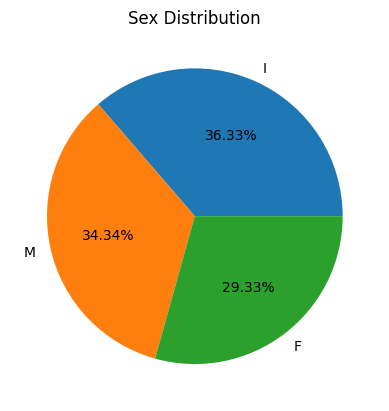

In [10]:
plt.pie(df['Sex'].value_counts(), labels=df['Sex'].value_counts().index, autopct='%1.2f%%')
plt.title('Sex Distribution')
plt.show();

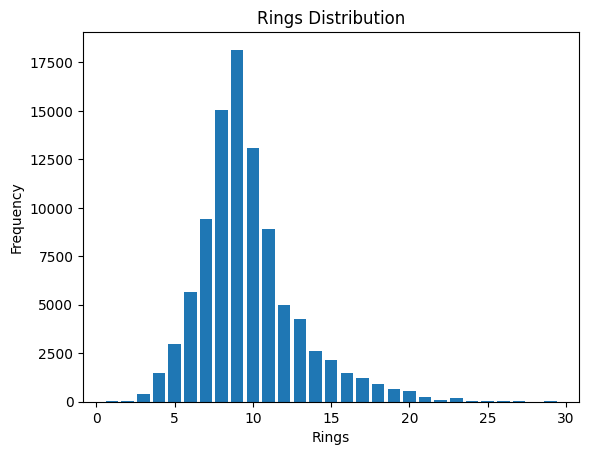

In [11]:
plt.bar(df['Rings'].value_counts().index, df['Rings'].value_counts().values)
plt.title('Rings Distribution')
plt.ylabel('Frequency')
plt.xlabel('Rings')
plt.show();

<Axes: xlabel='Rings', ylabel='Length'>

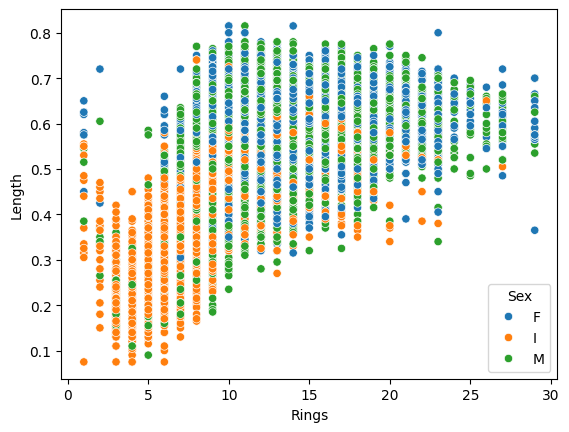

In [12]:
sns.scatterplot(x='Rings', y='Length', hue= 'Sex', data=df)

<Axes: xlabel='Rings', ylabel='Height'>

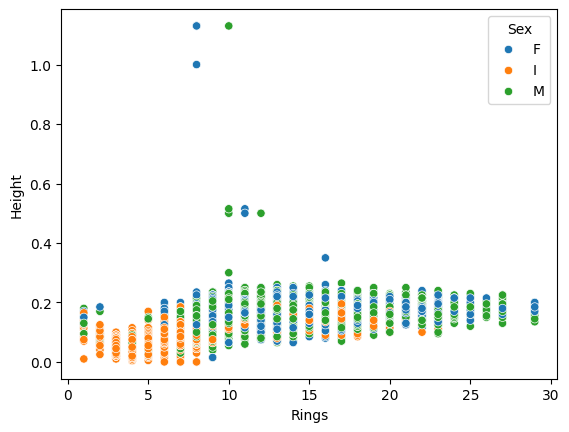

In [13]:
sns.scatterplot(x='Rings', y='Height', hue= 'Sex', data=df)

<Axes: xlabel='Rings', ylabel='Shell_weight'>

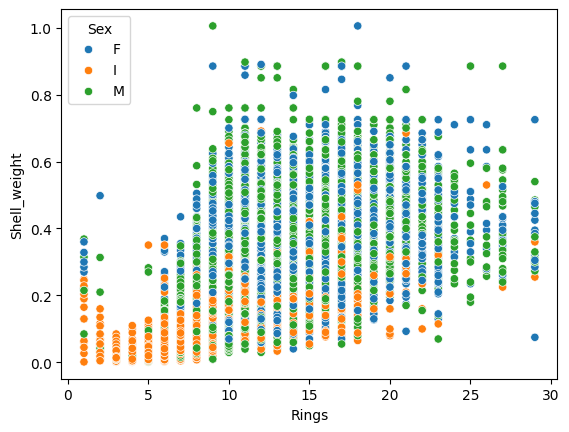

In [14]:
sns.scatterplot(x='Rings', y='Shell_weight', hue= 'Sex', data=df)

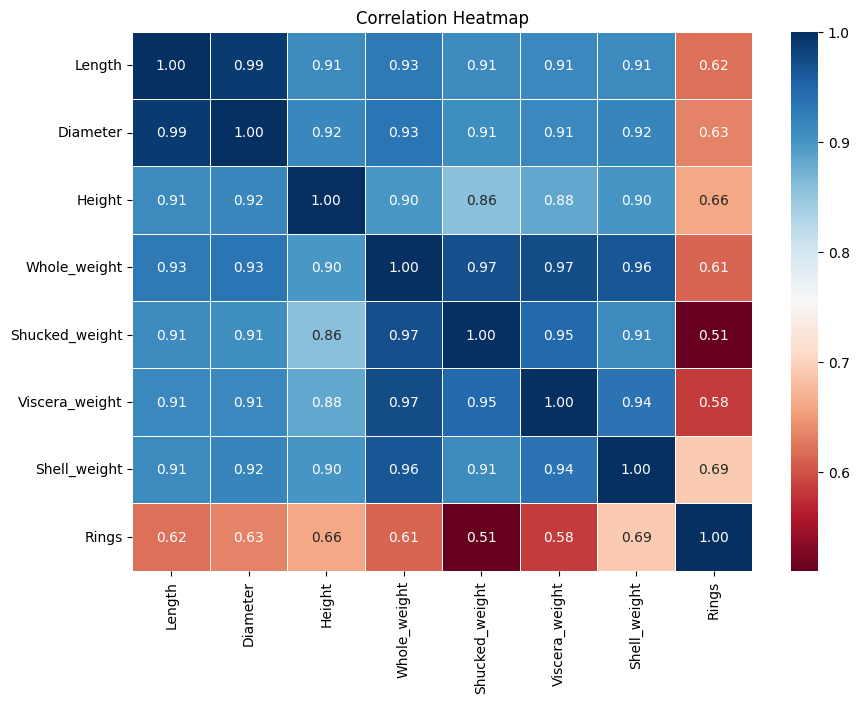

In [15]:
plt.figure(figsize=(10, 7))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='RdBu', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show();

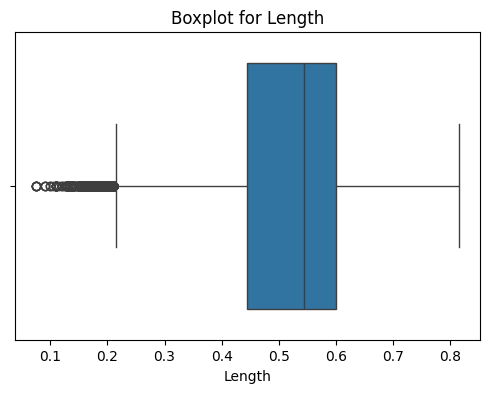

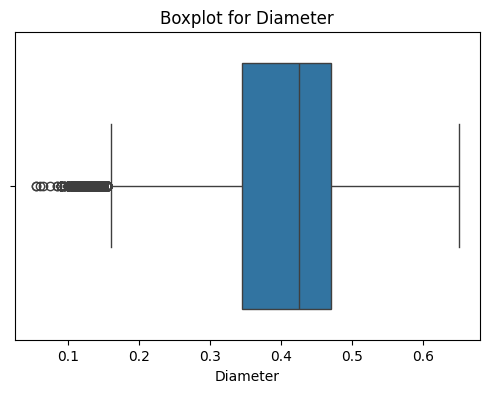

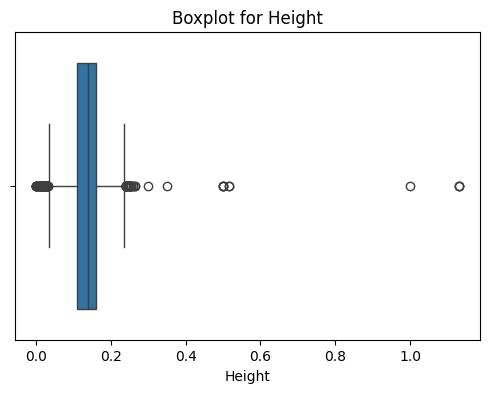

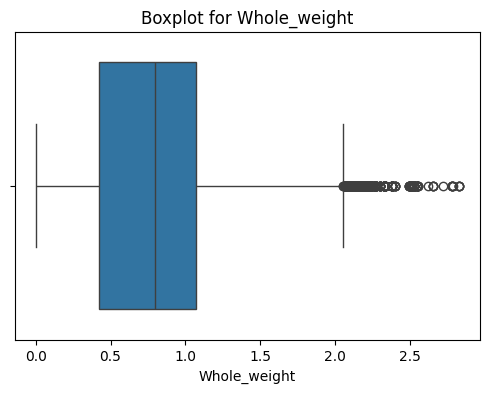

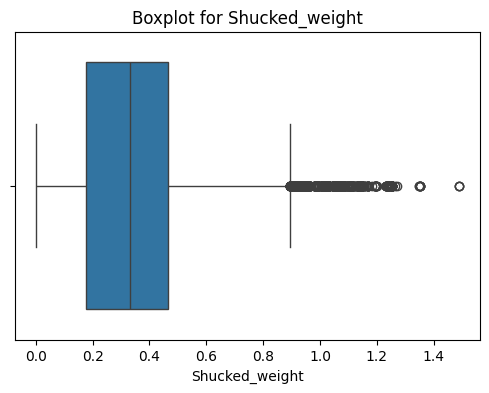

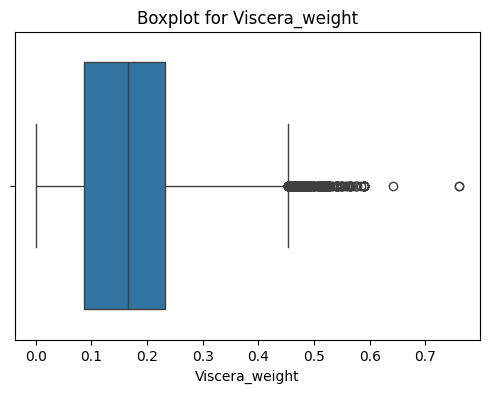

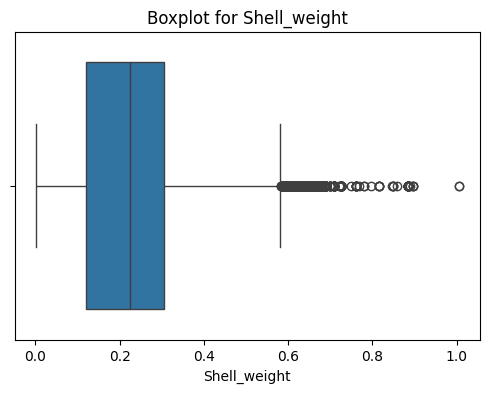

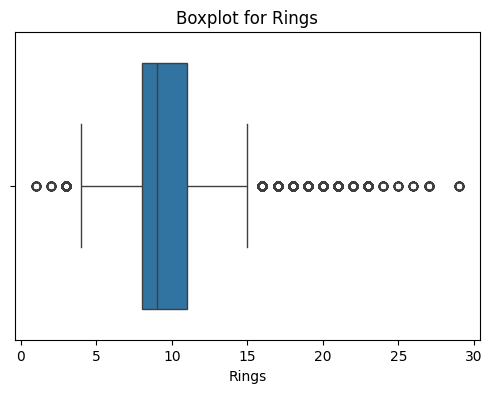

In [16]:
for col in df.columns:
    if col !="Sex":
        plt.figure(figsize=(6, 4))
        sns.boxplot(x=df[col])
        plt.title(f"Boxplot for {col}")
        plt.show();

In [17]:
x_cat = df.drop(['Sex', 'Rings'], axis=1)

In [18]:
# check for outliers percentage
for col_name, value in x_cat.items():
    Q1 = value.quantile(0.25)
    Q3 = value.quantile(0.75)
    IQR = Q3 - Q1

    # Outlier Bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify Outliers
    outliers = value[(value <= lower_bound) | (value >= upper_bound)]
    outliers_pct = np.shape(outliers)[0] * 100.0 / np.shape(x_cat)[0]
    print(f"{col_name}: {outliers_pct:.2f}%")

Length: 1.60%
Diameter: 1.73%
Height: 0.39%
Whole_weight: 0.65%
Shucked_weight: 1.07%
Viscera_weight: 0.52%
Shell_weight: 0.78%


<h2>Data Splitting</h2>

In [19]:
x = df.drop('Rings', axis=1)
y = df['Rings']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [20]:
le = LabelEncoder()
x_train['Sex'] = le.fit_transform(x_train['Sex'])
x_test['Sex'] = le.transform(x_test['Sex'])

In [21]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

<h2>Machine Learning</h2>

In [22]:
xgb = XGBRegressor(n_estimators=300, learning_rate=0.1, max_depth=4, random_state = 42)
xgb.fit(x_train, y_train)
r2_train = xgb.score(x_train, y_train)

# Make predictions
y_pred = xgb.predict(x_test)
r2_test = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Display results
print(f"R-squared(Train): {r2_train:.4f}")
print(f"R-squared(Test): {r2_test:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")

R-squared(Train): 0.6851
R-squared(Test): 0.6650
MAE: 1.2404
RMSE: 1.8273


Shell_weight: 0.7067
Shucked_weight: 0.1045
Height: 0.0686
Sex: 0.0399
Whole_weight: 0.0306
Length: 0.0205
Viscera_weight: 0.0167
Diameter: 0.0124


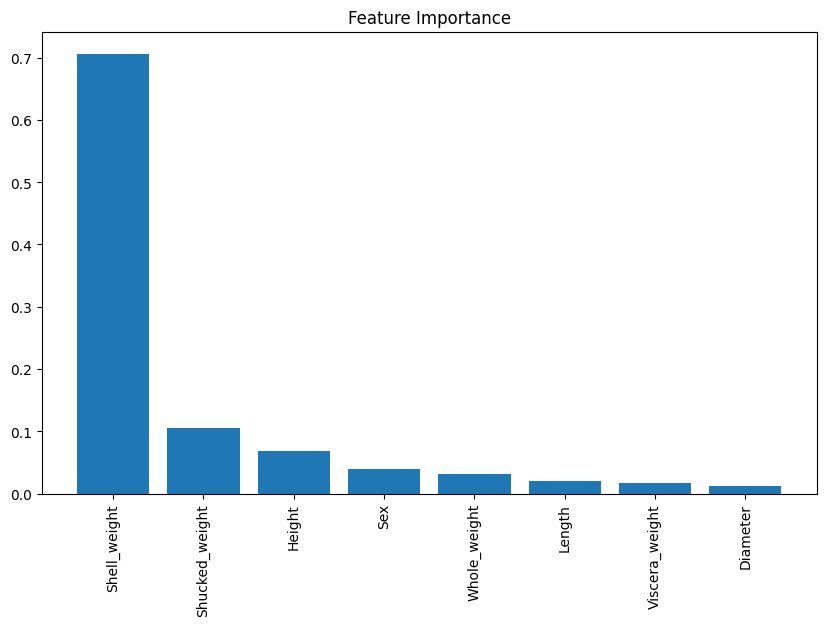

In [23]:
xgb_importances = xgb.feature_importances_
indices = np.argsort(xgb_importances)[::-1]
names = [x.columns[i] for i in indices]

for name, importance in zip(names, xgb_importances[indices]):
    print(f"{name}: {importance:.4f}")

# Create plot
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(x.shape[1]), xgb_importances[indices])
plt.xticks(range(x.shape[1]), names, rotation=90)
plt.show();

In [24]:
# Save ML models
joblib.dump(xgb, 'XGB_model.pkl')
print('XGB_model saved succesfully!')

XGB_model saved succesfully!


<h2>Deep Learning</h2>

In [25]:
tf.random.set_seed(42)

DL_model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='tanh'),
    tf.keras.layers.Dense(1)
])

# Compile the model
DL_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Train the model
history = DL_model.fit(x_train, y_train, epochs=200, batch_size=32, validation_data=(x_test, y_test), callbacks=[EarlyStopping(patience=5)])

Epoch 1/200
2370/2370 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 13.8282 - mae: 2.4465 - val_loss: 3.6090 - val_mae: 1.2649
Epoch 2/200
2370/2370 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 3.6327 - mae: 1.3014 - val_loss: 3.5563 - val_mae: 1.2484
Epoch 3/200
2370/2370 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 3.5853 - mae: 1.2915 - val_loss: 3.5370 - val_mae: 1.2446
Epoch 4/200
2370/2370 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 3.5685 - mae: 1.2881 - val_loss: 3.5287 - val_mae: 1.2427
Epoch 5/200
2370/2370 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 3.5578 - mae: 1.2855 - val_loss: 3.5159 - val_mae: 1.2410
Epoch 6/200
2370/2370 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 3.5472 - mae: 1.2833 - val_loss: 3.5031 - val_mae: 1.2402
Epoch 7/200
2370/2370 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 3.5390 - mae: 1.2812 - val_loss: 3.4912 - val_mae: 1.2390
Epoch 8/200
2370/2370 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 3.5314 - mae: 1.2796 - val_loss: 3.4846 - val_mae: 1.2391
Epoch 9/200
2370/2370 ━━━━━━

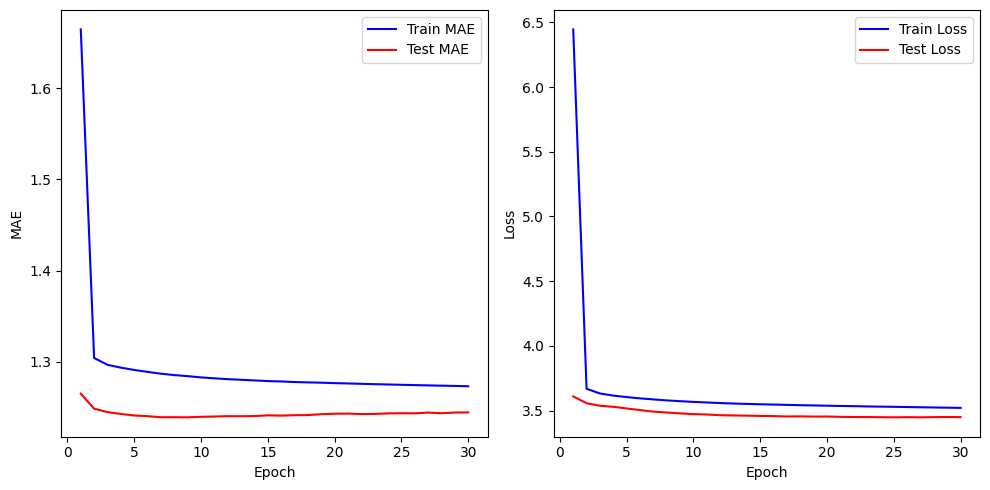

In [26]:
# learning curve
mae = history.history['mae']
val_mae = history.history['val_mae']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(mae) + 1)
# creating subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].plot(epochs, mae, 'b', label='Train MAE')
axes[0].plot(epochs, val_mae, 'r', label='Test MAE')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('MAE')
axes[0].legend()

axes[1].plot(epochs, loss, 'b', label='Train Loss')
axes[1].plot(epochs, val_loss, 'r', label='Test Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()

plt.tight_layout()

plt.show();

In [27]:
y_pred = DL_model.predict(x_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R2): {r2:.4f}")

593/593 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Root Mean Squared Error (RMSE): 1.8571
Mean Absolute Error (MAE): 1.2443
R-squared (R2): 0.6540


In [28]:
# Save DL model
DL_model.save('DL_model.keras')
print('DL model saved succeefully!')

DL model saved succeefully!


<h2>Machine Learning vs Deep Learning</h2>

In [29]:
# Load Models
XGB_model = joblib.load('XGB_model.pkl')
DL_model = load_model('DL_model.keras')

# get user input
Sex= int(input("Enter sex in integer (0:Female, 1:Infant, 2:Male): "))
Length = float(input("Enter the length of abalone: "))
Diameter = float(input("Enter the diameter of abalone: "))
Height = float(input("Enter the height of abalone: "))
Whole_weight = float(input("Enter the whole weight of abalone: "))
Shucked_weight = float(input("Enter the shucked weight of abalone: "))
Viscera_weight = float(input("Enter the viscera weight of abalone: "))
Shell_weight = float(input("Enter the shell weight of abalone: "))

# Make predictions
new_data = [[Sex, Length, Diameter, Height, Whole_weight, Shucked_weight, Viscera_weight, Shell_weight]]
transformed_new_data = sc.transform(new_data)
ML_prediction = XGB_model.predict(transformed_new_data)
DL_prediction = DL_model.predict(transformed_new_data)

print(f'Sex: {Sex}, Length: {Length}, Diameter: {Diameter}, Height: {Height}, Whole weight: {Whole_weight},\n Shucked weight: {Shucked_weight}, Viscera weight: {Viscera_weight}, Shell weight: {Shell_weight}')
print('')
print("ML predicted abalone's rings: ", ML_prediction)
print("DL predicted abalone's rings: ", DL_prediction)

Enter sex in integer (0:Female, 1:Infant, 2:Male): 0
Enter the length of abalone: 0.59
Enter the diameter of abalone: 0.47
Enter the height of abalone: 0.15
Enter the whole weight of abalone: 0.92
Enter the shucked weight of abalone: 0.4
Enter the viscera weight of abalone: 0.25
Enter the shell weight of abalone: 0.24
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Sex: 0, Length: 0.59, Diameter: 0.47, Height: 0.15, Whole weight: 0.92,
 Shucked weight: 0.4, Viscera weight: 0.25, Shell weight: 0.24

ML predicted abalone's rings:  [9.738563]
DL predicted abalone's rings:  [[9.673783]]
